# Internship project  - Fibre competitive intensity model
© Explore Data Science Academy

---
### Honour Code

I {**Team18**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents


<a href=#a>Introduction</a>

<a href=#b>Problem statement</a>

#### Section 1: Data Pre-processing

<a href=#one>1.1 Importing Packages</a>

<a href=#two>1.2 Loading Data</a>

<a href=#three>1.3 Exploratory Data Analysis (EDA)</a>

<a href=#four>1.4 Data Engineering</a>

#### Section 2: Model Development and Analysis

<a href=#five>2.1 Modeling</a>

<a href=#six>2.2 Model Performance</a>

#### Section 3: Model Explanation and Conclusions

<a href=#seven>3.1 Model Explanations</a>

 <a id="a"></a>

### Introduction


<a href=#cont>Back to Table of Contents</a>

---
The effects of uninterrupted electricity supply for households and businesses cannot be overemphasized. As non-renewable energy sources become depleted, it is imperative for countries to reasonably transition into renewables. The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. Thus, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. 

To achieve this aim, our team is developing a Machine Learning (ML) driven app that aims to predict the uptake of fibre optic connections for telecommunication companies. The app will provide accurate predictions that can help companies plan their resources and infrastructure accordingly. This Notebook has been so adapted and developed by **Team18** - a group of five students from the July 2022 cohort of the Explore Ai Academy **Data Science and data Engineering** courses. We are:

 > Kamogelo <br>
 > David Mugambi <br>
 > Ikaneng Jack <br>
 > Omolayo Ipinsanmi <br>
 > Atunima  <br>
 > 




 <a id="b"></a>


### Problem Statement

<a href=#cont>Back to Table of Contents</a>

---
The scenario was given to Team18, a team of senior data scientists, by our manager via email and we have developed a problem statement as follows:

- Telco companies have limited data-driven tools to support future fiber roll-out plans from a revenue perspective (e.g., HH uptake rates, competitive roll-outs,…)
- Current SaaS solutions mainly focus on advanced cost calculations (Comsof, Netadmin, etc) but fail to support possible expansion areas from a ROI point of view
- Project would consist in creating a tool which can predict revenue (based on HH uptake & competition) across geographies based on publicly available information, as granular as possible
- The userface output would consist of a visual map showing most attractive fiber roll-out areas, including a dashboard showing the underlying unit economics for that area (revenue, costs, ROI)
- The underlying scalable algorithm and database would be based on free open source data where we aim to identify unique commercial tenant's and households geospatially and provide meta data for each of these locations such as
    - commercial vs residential.
    - Multi dwelling unit vs single dwelling unit.
    - Expected people per household.
    - Demographic info and Behavioural info. i.e. age, income, internet usage.
- We would create data sets for Uganda, Malasya and townships in South Africa (part of Isizwe project)


### Objectives

The project will 

- 1. Determine, identify and collect relevant data;
- 2. Determine, identify and catalogue user needs;
- 3. identify potential errors in the data and clean the data set;
- 4. determine what features can be added to enrich user experience;
- 5. build a model that is capable of forecasting uptake of fibre fixed data services;
- 6. evaluate the accuracy of the best machine learning model;
- 7. determine what features were most important in the model’s prediction decision;
- 8. Develop an application to help users predict uptake in various geographical locations;
- 9. Develop additional functionalities such as determining ROI; and
- 10. explain the inner working of the model to a non-technical audience.

This document presents a technical account of the process undertaken to attain the set objective. The Notebook is structured into three primary sections. The first section comprises the data pre-processing stage and encompasses all the necessary steps taken to manipulate the datasets. It outlines the procedures for importing packages, loading the data, carrying out the exploratory data analysis (EDA), and executing data engineering.

The second section centers on model development and analysis, incorporating model performance and enhancement. Lastly, the third section concentrates on model explanations and conclusions drawn from the analysis.

 <a id="one"></a>
## 1.1 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
 Below are the libraries imported for use in this project. The libraries include the pandas library for data mnipulation and analysis, numpy for working with arrays, matplotlib for creating interactive visualisations, seaborn for making statistical graphics(plot graphs), and sklearn for machine learning and statisctical modelling. 

In [8]:


#!pip3 install scikit-learn

In [15]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import geopandas as gpd
import folium
from shapely import wkt

# Libraries for data preparation and model building
import math
import sklearn

<a id="two"></a>
## 1.2 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

In [13]:
#Load Ookla data with maps of Ugandan districts
example = pd.read_csv('../data2/uganda_tiless_dbf (1).csv')
print(example)

              quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices   
0    1223230333133010        4582        4481          23      2        1  \
1    1223230333133011        9168        7062          64    162        2   
2    1223230333133012        6797        8414          31     23        3   
3    1223230333133013        2435       43586          33      9        1   
4    1223230333133033        5837       11800          39      5        2   
..                ...         ...         ...         ...    ...      ...   
785  3001011010232221        2400       13503          87      2        1   
786  3001011012010010       27597       44755          13      6        1   
787  3001011012133023         178         452         346      3        1   
788  3001011011332102        1820        1045         780      1        1   
789  3001011012001001        2288        1884          19      1        1   

                                              geometry  index_right   
0   

In [14]:
# Extracting list of districts with Ookla fixed data
# Get unique values of the 'd' column and convert to a list
d_unique = example['d'].unique().tolist()

# Drop duplicates in the 'd' column of the DataFrame
#d_unique.drop_duplicates(subset=['d'], inplace=True) 
 
d_unique

['Arua',
 'Amuru',
 'Yumbe',
 'Obongi',
 'Adjumani',
 'Karenga',
 'Lamwo',
 'Pader',
 'Gulu',
 'Kikuube',
 'Kabarole',
 'Ntoroko',
 'Kyenjojo',
 'Kagadi',
 'Kasese',
 'Kamwenge',
 'Pakwach',
 'Nwoya',
 'Masindi',
 'Buliisa',
 'Kiryandongo',
 'Hoima',
 'Nakasongola',
 'Kole',
 'Lira',
 'Soroti',
 'Mubende',
 'Kassanda',
 'Mityana',
 'Mpigi',
 'Luwero',
 'Kaliro',
 'Wakiso',
 'Kampala',
 'Mukono',
 'Buikwe',
 'Jinja',
 'Kayunga',
 'Iganga',
 'Moroto',
 'Mbale',
 'Bududa',
 'Bugiri',
 'Busia',
 'Tororo',
 'Rubirizi',
 'Kanungu',
 'Rukungiri',
 'Sheema',
 'Mbarara',
 'Rubanda',
 'Kisoro',
 'Kabale',
 'Isingiro',
 'Lyantonde',
 'Masaka',
 'Kalangala',
 'Lwengo']

<a id="three"></a>
## 1.3 Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<Axes: >

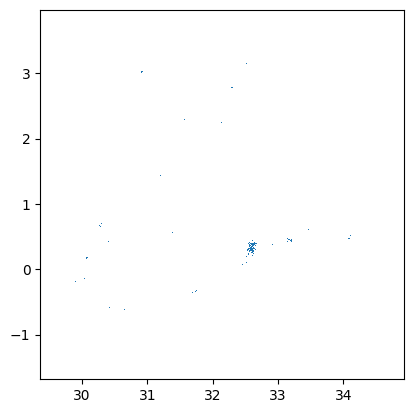

In [16]:
# Define the polygon

polygon = wkt.loads(example['geometry'])

# Create a GeoDataFrame with the polygon
gdf = gpd.GeoDataFrame(polygon)

# Plot the GeoDataFrame
gdf.plot()

In [17]:
# Create a map centered on Uganda
uganda_map = folium.Map(location=[1.3733, 32.2903], zoom_start=7)

# Define the polygon
polygon = wkt.loads(example['geometry'])

# Create a GeoDataFrame with the polygon
gdf = gpd.GeoDataFrame(polygon)

# Convert GeoDataFrame to GeoJSON string
geojson_data = gdf.to_json()

# Create a map centered on Uganda
#uganda_map = folium.Map(location=[1.3733, 32.2903], zoom_start=7)

# Add Uganda border GeoJSON data to the map
#folium.GeoJson(uganda_border.to_json()).add_to(uganda_map)

# Add the polygon to the map
folium.GeoJson(geojson_data).add_to(uganda_map)

# Add a marker for the capital city Kampala
folium.Marker(location=[0.3476, 32.5825], tooltip="Kampala").add_to(uganda_map)

# Display the map
uganda_map

<a id="four"></a>
## 1.4 Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

# <a id="five"></a>
## 2.1 Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="six"></a>
## 2.2 Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="seven"></a>
## 3.1 Model Explanation and Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---